In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [43]:
## acessing the csv file using pandas
churn_data = pd.read_csv("C:\\Users\\tejas\\Downloads\\archive (1)\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [44]:
## column headers in the dataset
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN


In [45]:
##understanding datatypes of columns
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce') ## converting blank cells into NAN values
mean_value = churn_data['TotalCharges'].mean()  ## claculating mean of totalcharges
churn_data['TotalCharges'].fillna(mean_value, inplace=True)  ## replacing NaN values with mean



In [47]:
print(churn_data['TotalCharges'].isnull().sum())   ## verifying if all the blank cells are replaced with mean

0


In [48]:
#reengineering some features to reduce the distance issues with some classification models.
churn_data['Tenure_in_yrs'] = churn_data['tenure']/12
churn_data['Monthlycharges_100s'] = round(churn_data['MonthlyCharges']/100,2)
churn_data['Totalcharges_1000s'] = round(churn_data['TotalCharges']/1000, 2)


In [70]:

churn_data['Churn'] = np.where(churn_data['Churn'] == 'Yes', 1, 0)


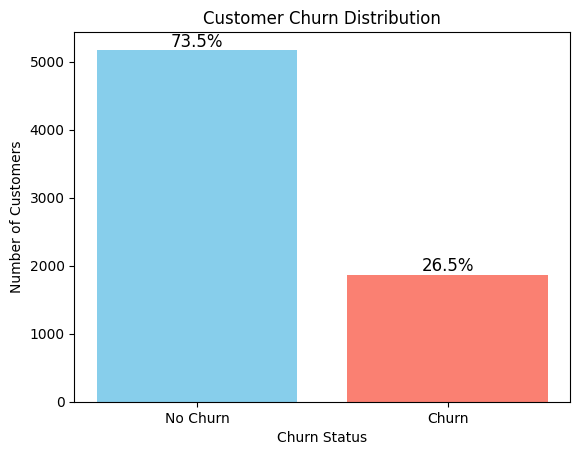

In [51]:
# Count churn values
churn_counts = churn_data['Churn'].value_counts()
churn_percent = churn_data['Churn'].value_counts(normalize=True) * 100

# Plot bar chart
bars = plt.bar(['No Churn','Churn'], churn_counts.values, color=['skyblue','salmon'])

# Annotate bars with percentages
for bar, percent in zip(bars, churn_percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{percent:.1f}%', ha='center', fontsize=12)

plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

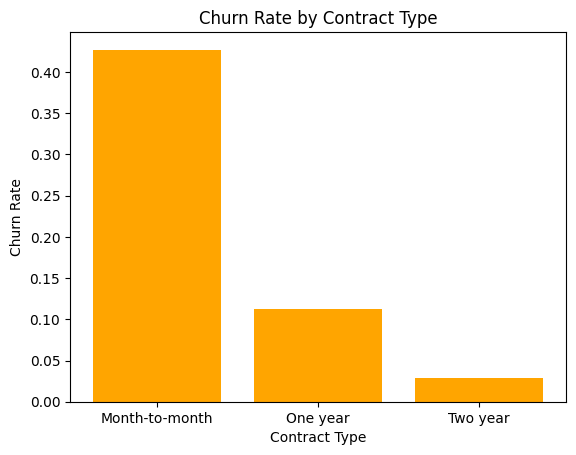

In [53]:
## contract type vs churn rate
contract_churn = churn_data.groupby('Contract')['Churn'].mean()

plt.bar(contract_churn.index, contract_churn.values, color='orange')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()



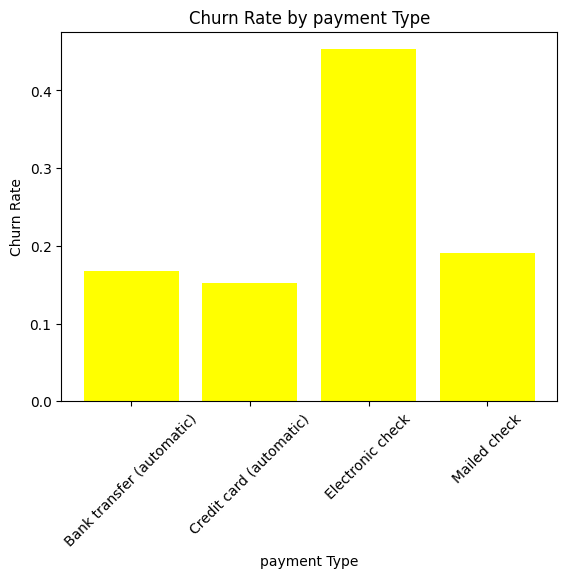

In [55]:
## contract type vs churn rate
Paymentmethod_churn = churn_data.groupby('PaymentMethod')['Churn'].mean()

plt.bar(Paymentmethod_churn.index, Paymentmethod_churn.values, color='yellow')
plt.xticks(rotation=45)
plt.title("Churn Rate by payment Type")
plt.xlabel("payment Type")
plt.ylabel("Churn Rate")
plt.show()


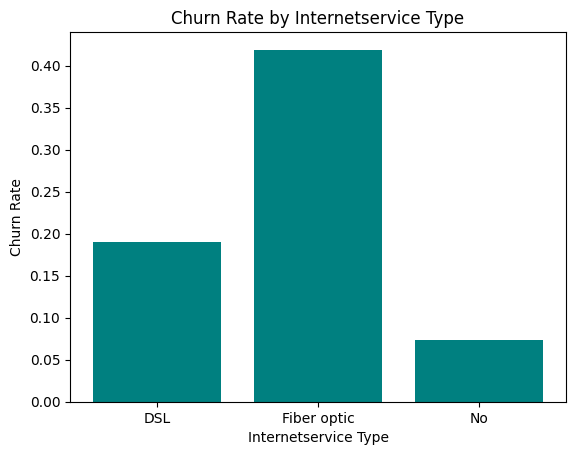

In [56]:
## churn vs internetservice
Internetservice_churn = churn_data.groupby('InternetService')['Churn'].mean()

plt.bar(Internetservice_churn.index, Internetservice_churn.values, color='teal')
plt.title("Churn Rate by Internetservice Type")
plt.xlabel("Internetservice Type")
plt.ylabel("Churn Rate")
plt.show()


In [58]:
##combining partner and dependents column to create new column family for efficient analysis
churn_data['Family'] = ((churn_data['Partner'] == 'Yes') | (churn_data['Dependents'] == 'Yes')).astype(int)


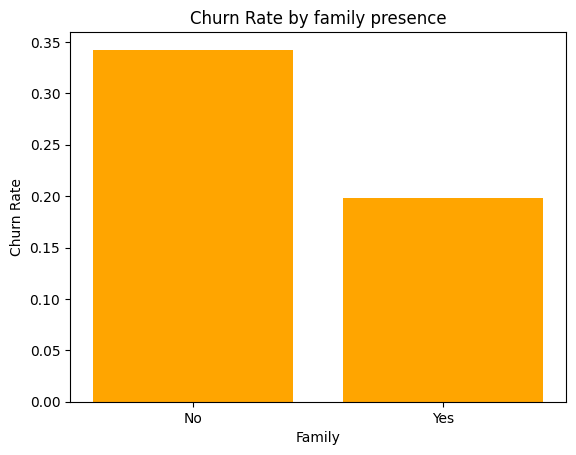

In [60]:
## churn vs family
Family_churn = churn_data.groupby('Family')['Churn'].mean()

plt.bar(['No','Yes'], Family_churn.values, color='orange')
plt.title("Churn Rate by family presence")
plt.xlabel("Family")
plt.ylabel("Churn Rate")
plt.show()

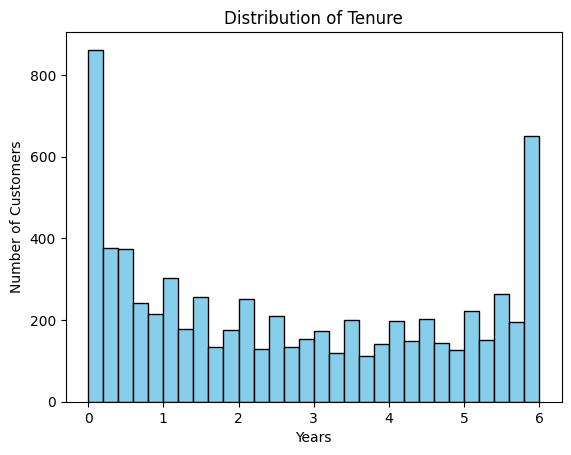

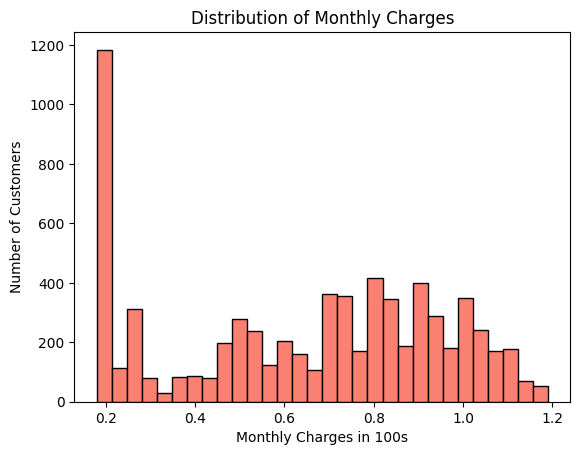

In [62]:
plt.hist(churn_data['Tenure_in_yrs'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tenure")
plt.xlabel("Years")
plt.ylabel("Number of Customers")
plt.show()

plt.hist(churn_data['Monthlycharges_100s'], bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges in 100s")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\tejas\AppData\Local\Temp\ipykernel_54120\1363936320.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([churn_data[churn_data['Churn']==0]['Tenure_in_yrs'], churn_data[churn_data['Churn']==1]['Tenure_in_yrs']],


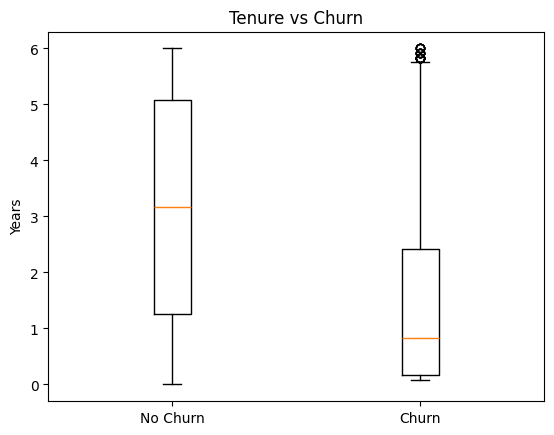

C:\Users\tejas\AppData\Local\Temp\ipykernel_54120\1363936320.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([churn_data[churn_data['Churn']==0]['Monthlycharges_100s'], churn_data[churn_data['Churn']==1]['Monthlycharges_100s']],


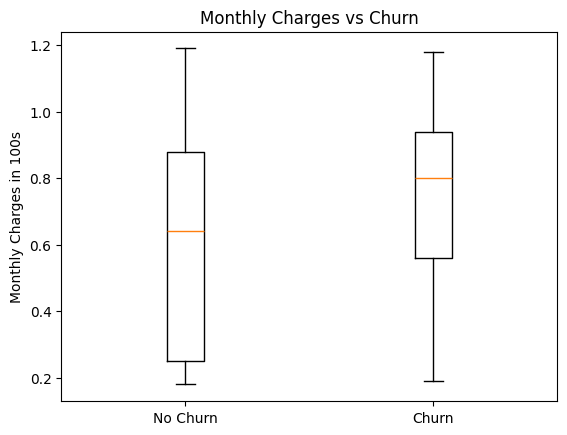

In [65]:
plt.boxplot([churn_data[churn_data['Churn']==0]['Tenure_in_yrs'], churn_data[churn_data['Churn']==1]['Tenure_in_yrs']],
            labels=['No Churn','Churn'])
plt.title("Tenure vs Churn")
plt.ylabel("Years")
plt.show()

plt.boxplot([churn_data[churn_data['Churn']==0]['Monthlycharges_100s'], churn_data[churn_data['Churn']==1]['Monthlycharges_100s']],
            labels=['No Churn','Churn'])
plt.title("Monthly Charges vs Churn")
plt.ylabel("Monthly Charges in 100s")
plt.show()


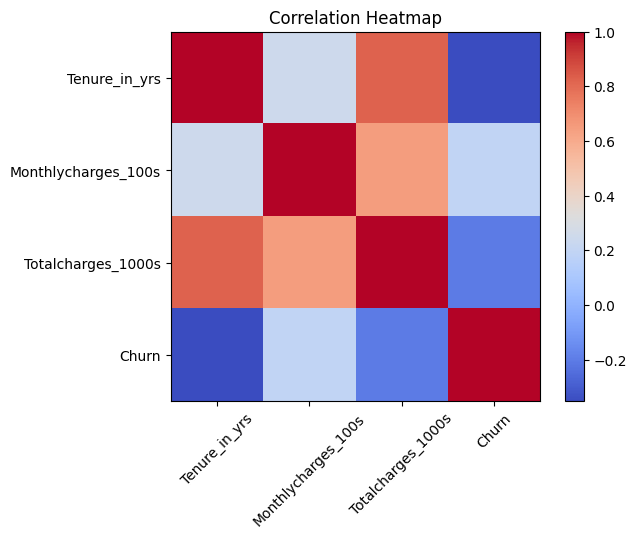

In [66]:
import numpy as np

corr = churn_data[['Tenure_in_yrs','Monthlycharges_100s','Totalcharges_1000s','Churn']].corr()
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


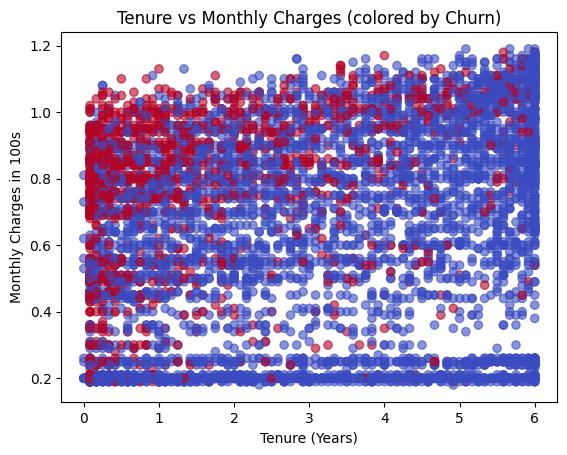

In [67]:

## visulaizing churn patterns
plt.scatter(churn_data['Tenure_in_yrs'], churn_data['Monthlycharges_100s'], c=churn_data['Churn'], cmap='coolwarm', alpha=0.6)
plt.title("Tenure vs Monthly Charges (colored by Churn)")
plt.xlabel("Tenure (Years)")
plt.ylabel("Monthly Charges in 100s")
plt.show()
